# Handwritten Digit Recognition
- Dataset
- Visualization
- CNN
- CPU & GPU

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [5]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [6]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
np.min(X_train), np.max(X_train)

(0, 255)

In [8]:
np.isnan(X_train).sum()

0

In [9]:
print(np.unique(y_train))   #

[0 1 2 3 4 5 6 7 8 9]


## Visualization

In [10]:
X_train[0]
X_train[0][0:, 7:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26],
       [  0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172],
       [ 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82],
       [ 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0],
       [  0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0],
       [  0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  35, 

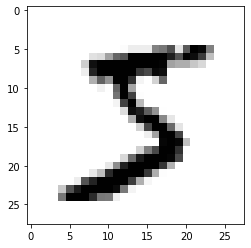

In [13]:
import matplotlib.pyplot as plt

idx = 0
img = X_train[idx]                       # 
plt.imshow(img, cmap=plt.cm.gray_r)      # actutal BG is black
# plt.imshow(img, cmap=plt.cm.gray) 

# plt.grid()
plt.show()

In [14]:
y_train[idx]              # class

5

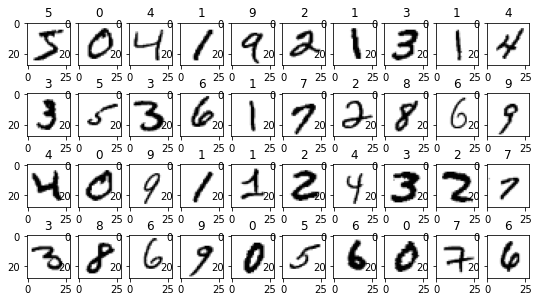

In [15]:
def visual_multi(i):
    nplots = 40
    fig = plt.figure(figsize=(9, 5)) 
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray_r)
        plt.title(y_train[i+j])
        # plt.xticks([]); # plt.yticks([])
    plt.show()

visual_multi(0)

## Prepare Dataset (Re-shape the Structure)
--> 60000x28x28x1 for Gray images

In [16]:
print(X_train.shape)
print(X_test.shape) 

(60000, 28, 28)
(10000, 28, 28)


In [17]:
# X_train = X_train.reshape((X_train.shape[0], 
#                            X_train.shape[1], 
#                            X_train.shape[2], 
#                            1)) # 
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

# X_train = X_train.reshape((60000, 28, 28, 1)) # 
# X_test = X_test.reshape((10000, 28, 28, 1))

# X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)

X_train = np.expand_dims(X_train, -1)     # run only Once! or  np.squeeze(X_train)
X_test = np.expand_dims(X_test, -1)

In [18]:
print(X_train.shape)
print(X_test.shape) 

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [20]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [21]:
X_train[0, :, 7:18, 0].round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.07, 0.07, 0.07, 0.49, 0.53],
       [0.  , 0.12, 0.14, 0.37, 0.6 , 0.67, 0.99, 0.99, 0.99, 0.99, 0.99],
       [0.19, 0.93, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98],
       [0.07, 0.86, 0.99, 0.99, 0.99, 0.99, 0.99, 0.78, 0.71, 0.97, 0.95],
       [0.  , 0.31, 0.61, 0.42, 0.99, 0.99, 0.8 , 0.04, 0.  , 0.17, 0.6 ],
       [0.  , 0.  , 0.05, 0.  , 0.6 , 0.99, 0.35, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.55, 0.99, 0.75, 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.75, 0.99, 0.27, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ,

In [22]:
X_train[0, 5, 7:, 0].round(2)
# X_train.shape

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.07, 0.07, 0.07, 0.49, 0.53,
       0.69, 0.1 , 0.65, 1.  , 0.97, 0.5 , 0.  , 0.  , 0.  , 0.  ],
      dtype=float32)

select samples

In [23]:
num_samples = 10000         # number of samples

X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

X_test = X_test[:num_samples]
y_test = y_test[:num_samples]

In [24]:
X_train.shape

(10000, 28, 28, 1)

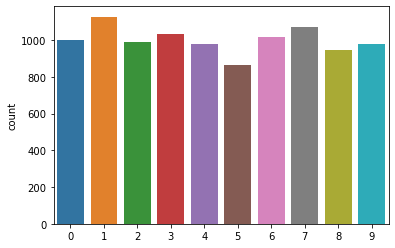

In [25]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y_train)

plt.show()
del sns, warnings

In [26]:
print('Train: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape, y_test.shape))

Train: X=(10000, 28, 28, 1), y=(10000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


## Create Model

In [27]:
num_classes = len(np.unique(y_train))
num_classes     # total classes

10

In [28]:
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten #, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu')) 

model.add(Dense(num_classes, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [33]:
import time
start = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.15) 

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/10
67/67 [==============================] - 4s 44ms/step - loss: 0.7187 - accuracy: 0.7967 - val_loss: 0.3301 - val_accuracy: 0.9047
Epoch 2/10
67/67 [==============================] - 3s 40ms/step - loss: 0.1896 - accuracy: 0.9466 - val_loss: 0.1903 - val_accuracy: 0.9447
Epoch 3/10
67/67 [==============================] - 3s 42ms/step - loss: 0.1205 - accuracy: 0.9654 - val_loss: 0.1456 - val_accuracy: 0.9580
Epoch 4/10
67/67 [==============================] - 3s 42ms/step - loss: 0.0892 - accuracy: 0.9736 - val_loss: 0.1048 - val_accuracy: 0.9693
Epoch 5/10
67/67 [==============================] - 3s 43ms/step - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.1062 - val_accuracy: 0.9700
Epoch 6/10
67/67 [==============================] - 3s 41ms/step - loss: 0.0559 - accuracy: 0.9840 - val_loss: 0.1078 - val_accuracy: 0.9667
Epoch 7/10
67/67 [==============================] - 3s 37ms/step - loss: 0.0449 - accuracy: 0.9869 - val_loss: 0.1000 - val_accuracy: 0.9713
Epoch 8/10
67

In [34]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9793
Accuracy: 0.979


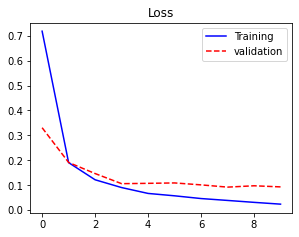

In [35]:
plt.figure(figsize=(4.7, 3.5))
plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.title('Loss')
plt.legend()
plt.show()

## Predict X_test

In [36]:
y_pred = model.predict(X_test)
y_pred[:8].round(2)

313/313 [==============================] - 1s 4ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
y_pred_cls = np.argmax(y_pred, axis=1)
y_pred_cls[:10].round(2)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [38]:
y_test[:10]             # actual class (real number) เลขจริง

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [39]:
idx_miss = np.where(y_pred_cls != y_test)

print(len(idx_miss[0]))

207


In [40]:
print(idx_miss[0][:15])

[115 247 320 321 324 340 412 490 492 582 613 720 740 844 896]


In [41]:
y_test[idx_miss][:15]           # actual class (real number)  เลขจริง

array([4, 4, 9, 2, 0, 5, 5, 0, 2, 8, 2, 5, 4, 8, 0], dtype=uint8)

In [42]:
y_pred_cls[idx_miss][:15]       # Predicted

array([9, 2, 8, 7, 6, 3, 3, 2, 8, 2, 8, 8, 9, 7, 2], dtype=int64)

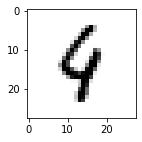

In [43]:
fig = plt.figure(figsize=(2, 2)) 
plt.imshow(X_test[idx_miss][0].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

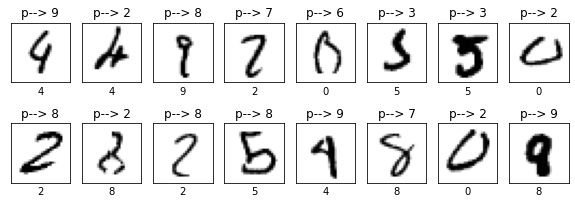

In [44]:
nplots = 16 

fig = plt.figure(figsize=(10, 3.4)) 
for j,k in enumerate(idx_miss[0]):
    plt.subplot(2, 8, j+1)
    plt.imshow(X_test[k].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title('p--> {}'.format(y_pred_cls[k]))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_test[k])
    if j >= nplots-1:
        break
#     plt.axis('off')

plt.show()

## Predict an image

### Upload

In [ ]:
# Upload
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))
print(filename)

In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

img = load_img('data/digit2-1.png', target_size=(28, 28))
img

### Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/MyDrive/Colab Notebooks/datasets'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

gpath = '/content/drive/MyDrive/Colab Notebooks/'

img = load_img(gpath + 'datasets/digit2-1.png', target_size=(28, 28))
img

### Read image

In [46]:
from PIL import Image, ImageOps

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('shape=',img.shape)
print('max pixel value=',np.max(img))

img = img /255.0
print('max pixel value=',np.max(img))

img = np.expand_dims(img, axis=0)
img.shape

shape= (28, 28, 1)
max pixel value= 254.97452
max pixel value= 0.99990004


(1, 28, 28, 1)

In [47]:
y_pred = model.predict(img)

print(y_pred.round(3))

1/1 [==============================] - 0s 25ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [48]:
predicted = np.argmax(y_pred, -1) 
print(predicted)

[2]


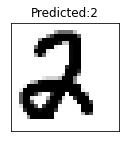

In [49]:
plt.figure(figsize=(2, 2))
plt.imshow(img[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

## Save Model

In [50]:
model.save('digitmodel.h5')